# 1. 기술통계

- 데이터를 요약하여 데이터의 전반적인 특성을 파악
- 기초 통계라고도 불림

## 1.1 기술 통계량

```python
df.describe()
```

- 개수
- 평균
- 표준편차
- 최솟값
- 최댓값
- 중앙값
- 사분위수

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.2 중심화경향

- 자료 전체를 대표하는 값을 찾을 때 어느 한 곳으로 모이는 경향으로 대표하는 값을 설정
- 평균, 중앙값, 최빈값 등을 사용
- 평균(mean), 산술평균

In [4]:
반_1 = [100, 0]
반_2 = [75, 25]
반_3 = [50, 50]

In [5]:
# 평균

반_1_평균 = sum(반_1)/len(반_1)
반_1_평균

50.0

In [6]:
반_2_평균 = sum(반_2)/len(반_2)
반_2_평균

50.0

In [7]:
반_3_평균 = sum(반_3)/len(반_3)
반_3_평균

50.0

- 기하평균 : n개를 모두 곱한 것의 n제곱근 → 비율과 같은 수치에 사용

In [8]:
# 기하평균 (파이썬 빌트인 함수로 구현)

반_1_증감률 = [1.0, 0.24, 3.2, 0.22, 0.09]

muls = 1
for i in 반_1_증감률:
    muls *= i
기하평균 = pow(muls, 1/len(반_1_증감률))
기하평균

0.43291763978372577

In [10]:
# 기하평균 (라이브러리로 구현)

import statistics as st

st.geometric_mean(반_1_증감률)

0.4329176397837257

In [9]:
#제곱 함수

pow(2,3) #2의 세제곱

8

- 조화평균 : 각 요소의 역수의 평균을 구한 후 다시 역수를

In [11]:
# 조화평균

변화율1 = [3.20, 5.12, 1.32, 0.97, 0.39]

sum = 0
for i in 변화율1:
  sum += 1/i
조화평균 = len(변화율1)/sum
조화평균

1.0287179671399014

In [12]:
st.harmonic_mean(변화율1)

1.0287179671399014

- 중앙값(median)

In [13]:
#중앙값 (홀수)

반 = [100, 0, 75, 25, 50, 50, 30]
반.sort()
반[int(len(반)/2)]

50

In [14]:
# 중앙값 (짝수)

반 = [100, 0, 75, 25, 50, 50]
반.sort()
(반[int(len(반)/2)]+반[int(len(반)/2)+1])/2

62.5

- 최빈값(mode)

In [17]:
반 = [100,30,75,25,50,55,30]

반 = pd.Series(반)
반.value_counts()

,count
30,2
100,1
75,1
25,1
50,1
55,1


- 분위수(q1, q2, q3)

In [18]:
# 분위수

반 = [100, 75, 25, 50, 50, 30, 24, 78, 45]
반.sort()
q1=반[int(len(반)*0.25)]
q2=반[int(len(반)*0.5)]
q3=반[int(len(반)*0.75)]

q1,q2,q3

(30, 50, 75)

## 1.3 산포도(분산도)

데이터가 중심에서 얼마나 퍼져 있는지 나타낸다.

- 분산(var) : 평균으로 부터 얼마나 퍼져있는지 나타낸다.
    
    평균으로부터 각 숫자들의 거리 편차를 제곱한 값의 평균 ⇒ 편차의 제곱의 평균

In [21]:
# 반_1 = [100, 0]
# 반_2 = [75, 25]
# 반_3 = [50, 50]

# 반_1 = [50, -50]
# 반_2 = [25, -25]
# 반_3 = [0, 0]
반_1_분산 = [50**2, (-50)**2]
반_2_분산 = [25**2, (-25)**2]
반_3_분산 = [0, 0]

In [23]:
# Reset 'sum' to its original function
sum = __builtins__.sum

반_1_분산 = sum(반_1_분산)/len(반_1_분산)
반_1_분산

2500.0

In [24]:
반_2_분산 = sum(반_2_분산)/len(반_2_분산)
반_2_분산

625.0

In [25]:
반_3_분산 = sum(반_3_분산)/len(반_3_분산)
반_3_분산

0.0

- 표준편차(std) : 분산으로 수치해석이 어렵기 때문에 분산에 제곱근 하여 나타냄
    - 데이터의 산포도(퍼진 정도)를 나타내는 값
    - 데이터가 밀집되지 않고 넓게 분포되어지면 표준편차의 값은 커짐
    - 표준편차가  작으면 평균 가까이 몰려있다는 뜻으로 큰 차이가 없다는 것을 알 수 있다.

In [26]:
# 표준편차

import math

반_1_표준편차 = math.sqrt(반_1_분산)
반_2_표준편차 = math.sqrt(반_2_분산)
반_3_표준편차 = math.sqrt(반_3_분산)

print(반_1_표준편차, 반_2_표준편차, 반_3_표준편차)

50.0 25.0 0.0


- 범위(range) = Max - Min

In [27]:
반 = [100, 75, 25, 50, 50, 30, 24, 78, 45]
반 = np.array(반)
반.max()-반.min()

76

- 사분위범위(IQR, InterQuartile Range) = 3분위수(Q3) - 1분위수(Q1)

In [28]:
반 = [100, 75, 25, 50, 50, 30, 24, 78, 45]
반.sort()
IQR=반[int(len(반)*0.75)]-반[int(len(반)*0.25)]
IQR

45

- 변동계수(CV) : 평균을 중심으로 상대적으로 얼마나 퍼져있는지에 대한 척도

In [29]:
반_1 = [100, 75, 25, 50 , 70]
반_2 = [50, 30, 24, 78, 45]

cv1 = np.std(반_1)/np.mean(반_1)
cv2 = np.std(반_2)/np.mean(반_2)

print('반_1의 CV계수 : {}'.format(np.round(cv1, 3)))
print('반_2의 CV계수 : {}'.format(np.round(cv2, 3)))

반_1의 CV계수 : 0.393
반_2의 CV계수 : 0.416


## 1.4 분포

- 왜도(skew) : 어느 한쪽으로 치우친 정도를 나타냄

In [32]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
titanic['age'].skew()

0.38910778230082704

<Axes: ylabel='Frequency'>

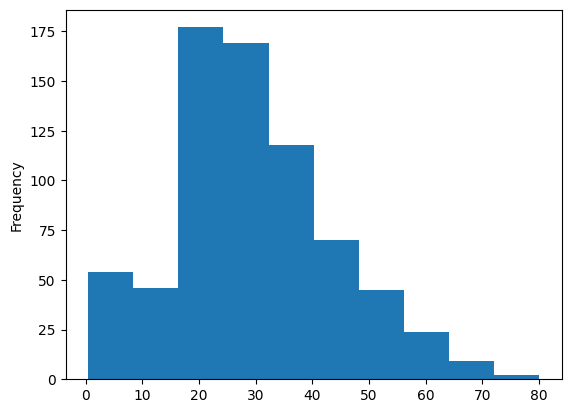

In [34]:
titanic['age'].T.plot.hist()

오른쪽으로 긴 경우 : 양(+)의 값, 평균 > 중앙값 > 최빈값

좌우대칭 : 0, 평균 = 중앙값 = 최빈값

왼쪽으로 긴 경우 : 음(-)의 값, 평균 < 중앙값 < 최빈값

- 첨도 : 뾰족한 정도, 평균 중심으로 몰릴 경우 뾰족한 모양을 띈다.

In [35]:
titanic['age'].kurt()

0.17827415364210353

3 미만 : 평평한 분포
3 : 정규분포
3 초과 : 뾰족한 분포

<Axes: xlabel='age', ylabel='Count'>

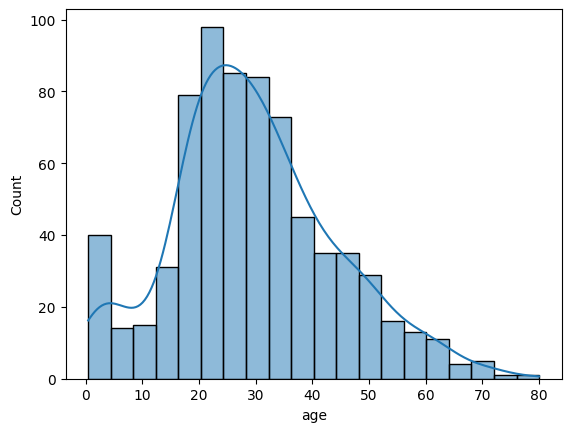

In [36]:
# 히스토그램으로 확인

sns.histplot(titanic['age'], kde=True)

# 2. 상관분석

## 2.1 공분산 : 2개의 확률변수 상관정도

- 하나의 값이 상승하는 경향을 보일 때, 다른 값도 상승하는 상관관계라면 공분산의 값은 양수
- 하나의 값이 상승하는 경향을 보일 때, 다른 값이 하강하는 경향의 상관관계라면 공분산의 값은 음수
- 두 변수(x, y)의 어떤 관계를 가지고 변화하는 측도를 나타냄
- 공분산이 양수이면 두 변수가 같은 방향이고, 음수일 경우 서로 다른 방향
- 공분산이 0이면 서로가 독립을 의미

In [37]:
수학점수 = []
컴퓨터점수 = []
for i in range(100):
    if i > 20 and i < 80:
        수학점수.append(i + np.random.randint(1, 30))
        컴퓨터점수.append(i + np.random.randint(1, 30))
    else:
        수학점수.append(i + np.random.randint(1, 10))
        컴퓨터점수.append(i + np.random.randint(1, 10))

In [39]:
print(수학점수[:20]) #수학점수 20개만 뽑기

[5, 8, 10, 6, 9, 8, 15, 8, 15, 12, 16, 13, 17, 14, 18, 18, 18, 25, 25, 20]


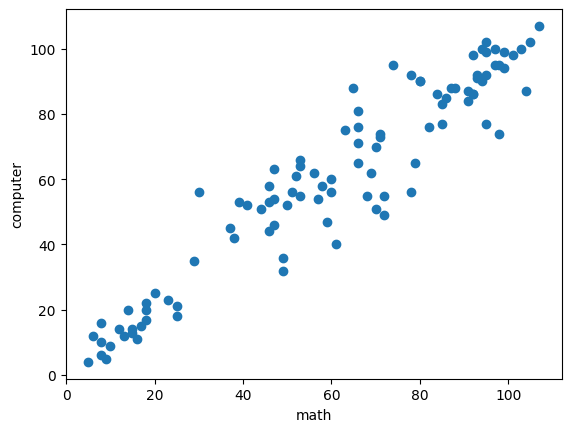

In [56]:
plt.scatter(수학점수, 컴퓨터점수)
plt.xlabel('math')
plt.ylabel('computer')

plt.show()

In [59]:
df = pd.DataFrame({
    '수학' : 수학점수,
    '컴퓨터' : 컴퓨터점수
})

df

,수학,컴퓨터
0,5,4
1,8,10
2,10,9
3,6,12
4,9,5
...,...,...
95,103,100
96,97,100
97,101,98
98,107,107


In [60]:
# 공분산

df.cov()

,수학,컴퓨터
수학,912.423838,847.078990
컴퓨터,847.078990,873.739293


In [61]:
df = pd.DataFrame({
    '수학' : 수학점수,
    '컴퓨터' : map(lambda x : -x, 컴퓨터점수)
})

df

,수학,컴퓨터
0,5,-4
1,8,-10
2,10,-9
3,6,-12
4,9,-5
...,...,...
95,103,-100
96,97,-100
97,101,-98
98,107,-107


In [62]:
df.cov()

,수학,컴퓨터
수학,912.423838,-847.078990
컴퓨터,-847.078990,873.739293


## 2.2 상**관계수(피어슨 상관계수)**

- 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인
- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [63]:
df = pd.DataFrame(np.random.randint(50, 100, size=(15, 5)),
     index = [['1학년' for i in range(5)]+
              ['2학년' for i in range(5)]+
              ['3학년' for i in range(5)],
              [str(i)+'반' for i in range(1, 6)] +
              [str(i)+'반' for i in range(1, 6)] +
              [str(i)+'반' for i in range(1, 6)]],
     columns = ['국', '영', '수', '사', '과'])
df

국   영   수   사   과
1학년 1반  93  68  60  62  61
    2반  69  95  66  73  84
    3반  93  52  81  91  90
    4반  76  87  83  51  66
    5반  83  74  76  66  87
2학년 1반  85  55  66  84  78
    2반  88  95  96  67  52
    3반  57  82  55  61  63
    4반  87  78  98  84  87
    5반  75  88  55  80  85
3학년 1반  90  55  96  90  64
    2반  79  59  74  50  93
    3반  89  75  84  76  55
    4반  78  95  95  56  75
    5반  78  95  76  74  79

In [64]:
#상관계수

df['국'].corr(df['사'])

0.42302577553219045

In [65]:
df = pd.DataFrame({
    '수학' : 수학점수,
    '컴퓨터' : map(lambda x : -x, 컴퓨터점수)
})

df

,수학,컴퓨터
0,5,-4
1,8,-10
2,10,-9
3,6,-12
4,9,-5
...,...,...
95,103,-100
96,97,-100
97,101,-98
98,107,-107


In [66]:
df.corr()

,수학,컴퓨터
수학,1.000000,-0.948713
컴퓨터,-0.948713,1.000000


In [67]:
df = pd.DataFrame({
    '수학' : 수학점수,
    '컴퓨터' : 컴퓨터점수
})

df

,수학,컴퓨터
0,5,4
1,8,10
2,10,9
3,6,12
4,9,5
...,...,...
95,103,100
96,97,100
97,101,98
98,107,107


In [68]:
df.corr()

,수학,컴퓨터
수학,1.000000,0.948713
컴퓨터,0.948713,1.000000


# 3. 추론통계

제한된 실험 환경에서 얻은 표본의 결과를 모집단에도 적용하려는 것

## 3.1 가설검정

- 자신의 주장이 맞는지 아닌지 판정하는 통계적 추측 과정
- 모집단의 실제값에 대한 sample의 통계치를 사용해서 통계적으로 유의한지 아닌지 판단

예시) 웹 페이지가 두개 있는데 TRY IT NOW 버튼의 색깔이 다르다. 이때 사람들이 어느 웹사이트에 TRY IT NOW 버튼을 많이 클릭하는지 봤을 때 오른쪽 웹 사이트의 클릭율이 높았다.

이때, 우리는 오른쪽 웹사이트의 클릭율이 높았던 이유는 버튼색깔이 바뀌어서 클릭율이 높았다고 말할 수 있는가?

https://paullabworkspace.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Fd36285ac-1979-455f-9109-5df6c14f0fc1%2FUntitled.png?table=block&id=17f6b8e5-dd5e-4b9a-ad45-5d9112a790bf&spaceId=579fe283-28aa-489d-ae65-d683304becfc&width=1150&userId=&cache=v2

1. 가설 세우기
- 귀무가설($H_0$) : 검정 대상이 되는 가정
    
    $H_0$ : A 디자인에서 클릭수가 많았으므로 A디자인이 B디자인 보다 더 좋은 디자인이다.
    
    $H_0$ : $\bar A=\bar B$
    
- 대립가설($H_1$) : 귀무가설이 기각될 때 받아들여지는 가설
    
    $H_1$ : A 디자인에서 클릭수가 많았지만 A디자인이 B디자인 보다 더 좋은 디자인은 아니다.→외부요인이 있을것이다.
    
    $H_1$ : $\bar A \not= \bar B$
    
1. 유의 수준($\alpha$) 설정
    
    귀무가설이 참일 때, 기각(틀렸다고)하게 될 확률
    
    유의 수준이 낮을 수록 귀무가설을 기각하고 자신의 주장에 확신을 가짐
    
    - 1%→ 99% 신뢰수준
    - 5%→95% 신뢰수준, 통상적으로 많이 쓰임
    - 10%→90% 신뢰수준
    
    신뢰수준(1-$\alpha$) : 신뢰할 수 있는 구간

2. 검정통계량 : 가설 검정을 위한 기준값
    
    독립 T-test : 두개의 집단이 통계적으로 같은지 다른지 비교하기 위해 사용, 데이터가 100% 같다면 statistic은 0을, pvalue는 1이 나옵니다.

In [69]:
# scipy(싸이파이라고 읽음) 과학기술계산을 위한 Python 라이브러리
# stats는 여러 확률 분포 분석 함수 제공
from scipy import stats

A디자인 = np.random.randint(50, 200, size=30)
B디자인 = np.random.randint(50, 200, size=30)

print(len(A디자인), np.mean(A디자인), np.std(A디자인))
print(len(B디자인), np.mean(B디자인), np.std(B디자인))

stats.ttest_ind(A디자인,B디자인)

30 137.3 39.734242159628515
30 120.4 44.14113727578844


TtestResult(statistic=1.5323839073273455, pvalue=0.1308645508524108, df=58.0)

In [70]:
#같은 디자인 일때

stats.ttest_ind(A디자인,A디자인)

TtestResult(statistic=0.0, pvalue=1.0, df=58.0)

3. 통계적 판단
    
    검정통계량, P-value값이 나온다.
    
    ```python
    Ttest_indResult(statistic=1.1188977410821805, pvalue=0.2779134152275092)
    ```
    
    - 유의 수준에 따라 기각역이 정해지고, 기각역에 확률값이 위치하면 귀무가설 기각
        - 검정통계량|T| : 1.1188977410821805
        - 기각역 : 검정통계량(|T|)≥$t_{\alpha/2}$(n+m-2)
            
            ![위니브](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/c54e34ca-a7eb-4db6-94ae-8336399a91d0/Untitled.png)
            
            위니브
            
            - T : 검정통계량
            - df : 자유도, 독립적인 자료의 수→(n+m-2)
            - n : A디자인의 개수
            - m : B디자인의 개수
            
             |T|≥$t_{0.025}$(30+30-2)⇒ |T|≥$t_{0.025}$(58)$\doteqdot$2
            
            <aside>
            💡 여기서 0.025라는 수치가 나온 이유는 유의수준을 0.05로 잡았기 때문입니다. 유의수준(a)은 0.01, 0.05, 0.10이 있으며 각각의 신뢰수준(1-a)은 99%, 95%,90%가 있습니다. 통상적으로 유의수준(a) 0.05를 많이 사용하기 때문에 예제에서도 유의수준은 0.05라고 선정한 것입니다. 따라서 신뢰수준(1-a)=95%에서 귀무가설을 옳다는 가정하에 통계적 판단을 하겠다는 것입니다.
            
            </aside>
            
            T분포표를 검색한 후 $t_{0.025}$(58)를 찾아보면 약 2.000이 나온 것을 볼 수 있다.
            
            ![T 분포표(신뢰 구간 섹션의 값)](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/eb39c7a5-2e4b-42a1-8b16-958a3ca688a4/Untitled.png)
            
            T 분포표(신뢰 구간 섹션의 값)
            
            [T분포표 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/T%EB%B6%84%ED%8F%AC%ED%91%9C)
            
            1.1188977410821805<2⇒$H_0$ 귀무가설 기각할 수 없다.⇒귀무가설 채택
            
            ![위니브](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/c37daee5-7e02-403d-a03f-3db9830feda9/Untitled.png)
            
            위니브
            
        - A 디자인에서 클릭수가 많았으므로 A 디자인이 B디자인 보다 더 좋은 디자인이다.
    - p-value
        - p-value < $\alpha$ : 귀무가설 기각
        - p-value > $\alpha$ : 귀무가설 채택
        - 귀무가설 채택 0.2779134152275092>0.05
            
            → A 디자인에서 클릭수가 많았으므로 A 디자인이 B디자인 보다 더 좋은 디자인이다.